# VGG16 Model | CIFAKE


In [29]:
from keras.layers import Dense, Flatten
from keras.applications import VGG16
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL
from keras.optimizers import RMSprop

PIL.Image.MAX_IMAGE_PIXELS = None

In [30]:
model_name = "vgg16-rmsprop-epochs100_model_cifake"
dataset_base_path = "./datasets/CIFAKE"

# Forcefully train the model
force_model_train = True

# Don't save the model
no_save = False

In [31]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [32]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [33]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            base_model,
            Flatten(),
            Dense(512, activation="relu"),
            Dense(2, activation="softmax"),
        ],
        optimizer=RMSprop()
    )

In [34]:
# Model summary
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [35]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [36]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/100
10000/10000 [==============================] - 75s 7ms/step - loss: 0.4605 - accuracy: 0.7905 - val_loss: 0.4056 - val_accuracy: 0.8302
Epoch 2/100
10000/10000 [==============================] - 73s 7ms/step - loss: 0.4335 - accuracy: 0.8115 - val_loss: 0.4045 - val_accuracy: 0.8300
Epoch 3/100
10000/10000 [==============================] - 73s 7ms/step - loss: 0.4302 - accuracy: 0.8149 - val_loss: 0.4006 - val_accuracy: 0.8367
Epoch 4/100
10000/10000 [==============================] - 71s 7ms/step - loss: 0.4292 - accuracy: 0.8145 - val_loss: 0.3804 - val_accuracy: 0.8428
Epoch 5/100
10000/10000 [==============================] - 71s 7ms/step - loss: 0.4255 - accuracy: 0.8171 - val_loss: 0.3860 - val_accuracy: 0.8407
Epoch 6/100
10000/10000 [==============================] - 73s 7ms/step - loss: 0.4251 - accuracy: 0.8187 - val_loss: 0.4216 - val_accuracy: 0.8309
Epoch 7/100
10000/10000 [==============================] - 73s 7ms/step - loss: 0.4257 - accuracy: 0.8178 - val_

In [37]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/vgg16-rmsprop-epochs100_model_cifake/model\assets


INFO:tensorflow:Assets written to: ./models/vgg16-rmsprop-epochs100_model_cifake/model\assets


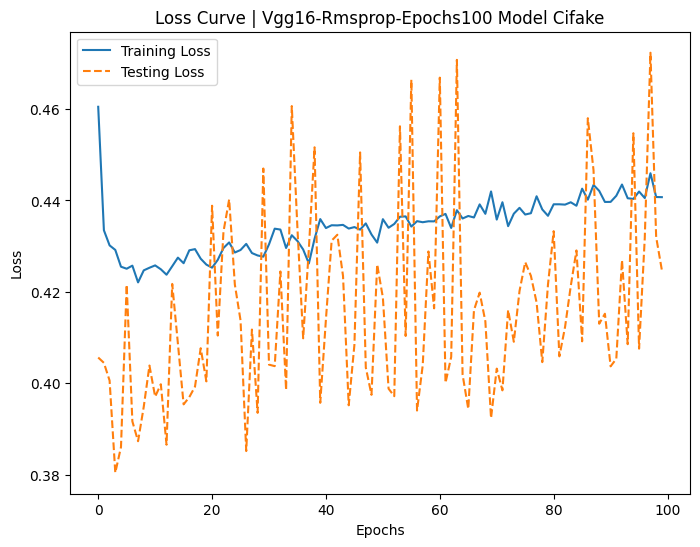

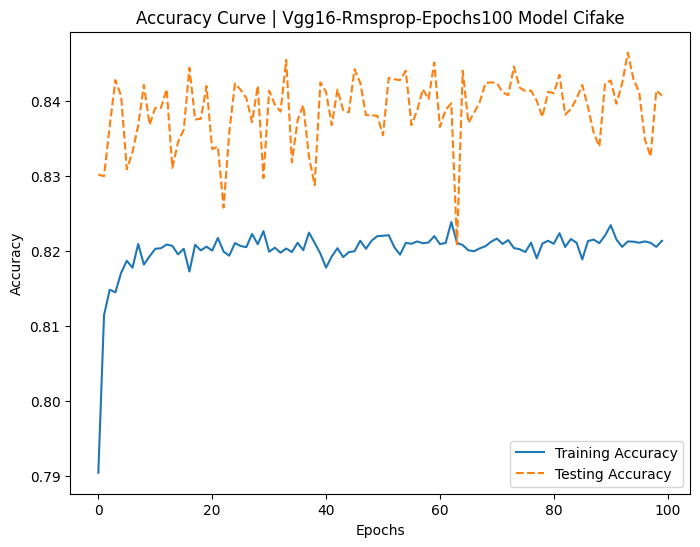

In [38]:
# Plot performance curves
plot_performance_curves(history, model_name)